In [13]:
import os 
import numpy as np

import matplotlib.pyplot as plt

import Utility
import PythonKEX

In [14]:
ap_filesize=4096

In [15]:
#KEX data
norm_path = r"C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-norm.n"
    
norm_str = "normalization matrix"

    #constants from header
#little endian, float, 4 bytes
data_format = np.float32
data_format = '<f4'
bytes_per_entry=4

#descriptions
normalization_component= ["geometric effects",
                          "crystal interference",
                          "crystal efficiencies",
                          "axial effects",
                          "paralyzing ring DT parameters",
                          "non-paralyzing ring DT parameters",
                          "TX crystal DT parameter"]

#positions in the 1D data file
data_offset_in_bytes= np.array([0,
                          174400,
                          196800,
                          344640,
                          347124,
                          347344,
                          347564])

#number of dimensions
number_of_dimensions=[2,
                      2,
                      2,
                      1,
                      1,
                      1,
                      1]

#matrix sizes
matrix_size =[(400,109),
              (14,400),
              (672,55),
              621,
              55,
              55,
              14]
#dimension labels
matrix_axis_labels =[("sinogram projection bins","sinogram planes"),
                    ("crystal number","sinogram projection bins"),
                    ("crystal number","ring number"),
                    "plane number",
                    "ring number",
                    "ring number",
                    "crystal number"]


In [8]:


# another norm file, using mCT version of e7 tools
norm_path = r"C:/Users/petct/Desktop/Siemense7tools/Siemense7tools/JSRecon12-TestData/mCTTestData-Converted/mCTTestData-norm.n"
#norm_path = r"C:/Users/petct/Desktop/Siemense7tools/Siemense7tools/JSRecon12-TestData/VG60TestData-Converted/VG60TestData-norm.n"
        #r"C:/Users/petct/Desktop/CylinderPET-Converted/CylinderPET-norm.n"]
#phantom_strings = []
#for path in norm_paths:
    #phantom_strings.append(path.split('/')[-1].split('PET')[0])
    
    #constants from header
#little endian, float, 4 bytes
data_format = np.float32
data_format = '<f4'
bytes_per_entry=4

#descriptions
normalization_component= ["geometric effects",
                          "crystal interference",
                          "crystal efficiencies",
                          "axial effects",
                          "paralyzing ring DT parameters",
                          "non-paralyzing ring DT parameters",
                          "TX crystal DT parameter"]

#positions in the 1D data file
data_offset_in_bytes= np.array([0,
                          146496,
                          165312,
                          313152,
                          315388,
                          315608,
                          315828])

#number of dimensions
number_of_dimensions=[2,
                      2,
                      2,
                      1,
                      1,
                      1,
                      1]

#matrix sizes
matrix_size =[(336,109),
              (14,336),
              (672,55),
              559,
              55,
              55,
              14]
#dimension labels
matrix_axis_labels =[("sinogram projection bins","sinogram planes"),
                    ("crystal number","sinogram projection bins"),
                    ("crystal number","ring number"),
                    "plane number",
                    "ring number",
                    "ring number",
                    "crystal number"]


In [16]:
with open(norm_path, 'rb') as file:
    norms_1D=np.fromfile(file, dtype=data_format)

In [17]:
last_byte = data_offset_in_bytes[1:]
last_byte = np.append(last_byte, data_offset_in_bytes[-1]+bytes_per_entry*np.prod(matrix_size[-1]))
data_offset_index= data_offset_in_bytes // bytes_per_entry
last_index = last_byte // bytes_per_entry

In [18]:
matrices = []
for k,dims in enumerate(number_of_dimensions):
    temp = norms_1D[data_offset_index[k]:last_index[k]]
    if (dims>1):
        temp = np.reshape(temp, newshape=matrix_size[k], order='F')
    matrices.append(temp)

C:\Users\petct\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


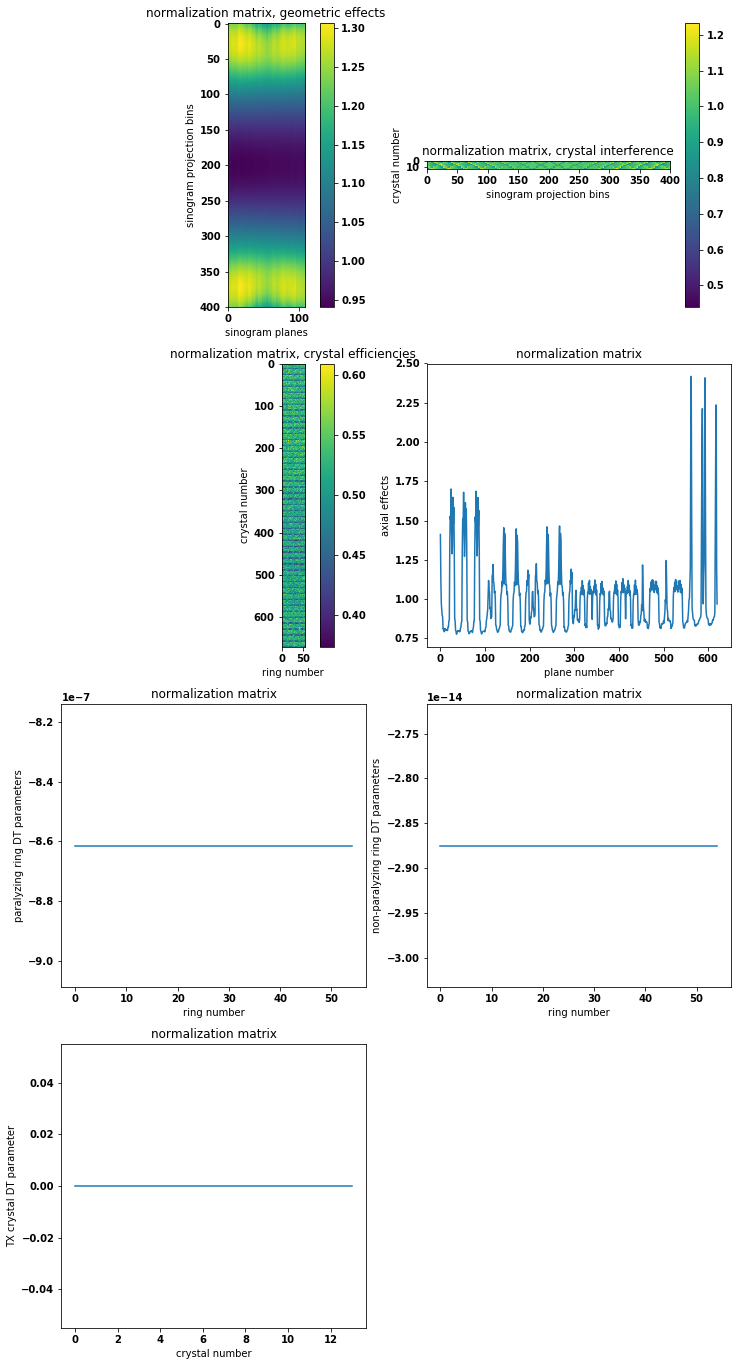

In [19]:
#plot the norm files
#select which ones 
interesting_matrices = np.arange(len(normalization_component))
columns = 2
n_matrices = len(interesting_matrices)
plot_scale=6
plot_shape = np.array([columns, n_matrices//columns+1])
flip = True
if flip:
    plot_shape = np.flip(plot_shape)
plt.figure(figsize=tuple(np.flip(plot_shape*plot_scale)))
#print("plot_shape", plot_shape)

for plot_matrix in range(n_matrices):
    #print("multi_index", multi_index)
    subplot_number = plot_matrix+1

    plt.subplot(plot_shape[0],plot_shape[1],subplot_number)
    mat = interesting_matrices[plot_matrix]
    if number_of_dimensions[mat] == 1:
        plt.plot(matrices[mat])
        plt.xlabel(matrix_axis_labels[mat])
        plt.ylabel(normalization_component[mat])
        plt.title(norm_str)
    else:
        plt.imshow(matrices[mat], aspect='equal')
        plt.ylabel(matrix_axis_labels[mat][0])
        plt.xlabel(matrix_axis_labels[mat][1])
        plt.colorbar()
        plt.title(norm_str + ", " + normalization_component[mat])

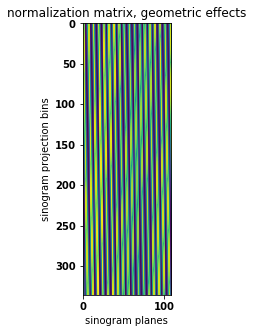

In [336]:
#plot the norm files
#select which ones 
#interesting_matrices = np.arange(7)
interesting_matrices = [0]
n_files = 1 #len(matrices)
n_matrices = len(interesting_matrices)
plot_scale=5
plot_shape = np.array([n_matrices, n_files])
flip = True
if flip:
    plot_shape = np.flip(plot_shape)
plt.figure(figsize=tuple(np.flip(plot_shape*plot_scale)))
#print("plot_shape", plot_shape)

for plot_matrix in range(n_matrices):
    #print("multi_index", multi_index)
    subplot_number = plot_matrix+1

    plt.subplot(plot_shape[0],plot_shape[1],subplot_number)
    mat = interesting_matrices[plot_matrix]
    #print("mat", mat)
    if number_of_dimensions[mat] == 1:
        plt.plot(matrices[mat])
        plt.xlabel(matrix_axis_labels[mat])
        plt.ylabel(normalization_component[mat])
        plt.title(norm_str)
    else:
        plt.imshow(matrices[mat], aspect='equal')
        plt.ylabel(matrix_axis_labels[mat][0])
        plt.xlabel(matrix_axis_labels[mat][1])
        plt.title(norm_str + ", " + normalization_component[mat])

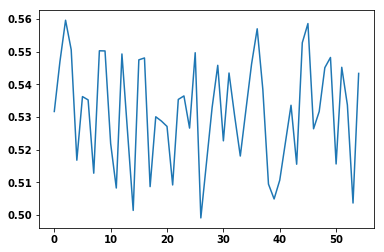

In [9]:
plt.subplot
plt.plot(matrices[2][5,:])
plt.show()

In [10]:
print(matrix_size[2])

(672, 55)


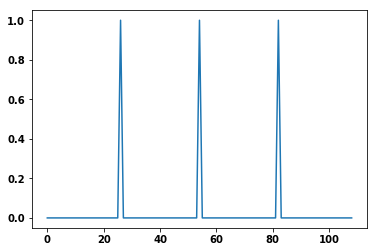

In [317]:
#virtual crystals halfplanes
virtual_crystals = np.zeros(Utility.SEGMENT_TABLE[0],dtype=bool)
virtual_crystals[2*13::2*14] = True
#virtual_crystals[2*13+1::2*14] = True
plt.plot(virtual_crystals)
plt.show()

In [318]:
#ring pairs per sinogram
#start with 0 at the ends of each segment, then increase up to span
# keep count

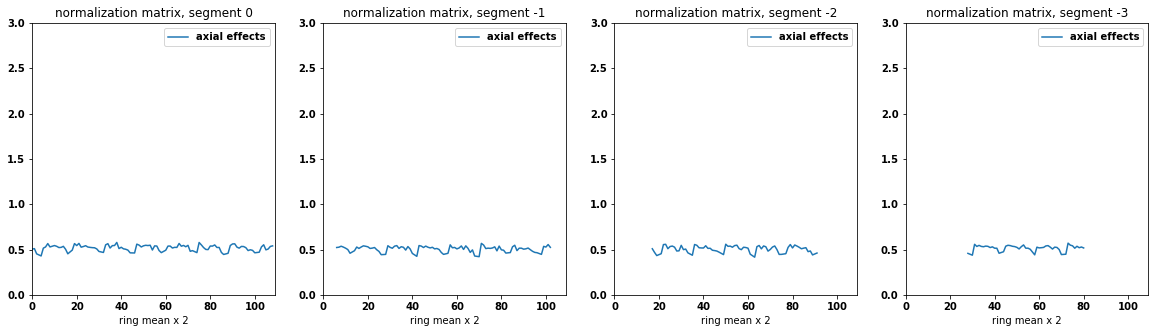

In [341]:
#split up the axial normalization componens by axial offset

interesting_segments = [0] 
interesting_segments = np.arange(0,len(Utility.SEGMENT_TABLE)-1,2)
n_files = len(matrices)
#sufficient to look at one, they are identical
n_segs = len(interesting_segments)
plot_scale=5
plot_shape = np.array([n_segs, 1])
flip = True
if flip:
    plot_shape = np.flip(plot_shape)
plt.figure(figsize=tuple(np.flip(plot_shape*plot_scale)))
#print("plot_shape", plot_shape)
#select axial effects matrix

for k in range(n_segs):

    #print("multi_index", multi_index)
    subplot_number = k+1

    plt.subplot(plot_shape[0],plot_shape[1],subplot_number)
    seg = interesting_segments[k]
    #segment range
    a = Utility.FIRST_MI_OF_SEGMENT[seg]
    b= a + Utility.SEGMENT_TABLE[seg]
    #print("axial_offsets", axial_offsets)
    #ia = 0
    #ib = Utility.SEGMENT_TABLE[seg]
    #plt.plot(axial_offsets[ia:ib], matrices[mat][ia:ib])
    mat = 3 
    plt.plot(Utility.AXIAL_OF_MI[a:b], matrices[mat][a:b])
    #plt.plot(axial_offsets[virtual_crystals],matrices[mat][ia:ib][virtual_crystals], 'x')
    plt.legend([normalization_component[mat], 'here is virtual crystal'])
    plt.xlabel("ring mean x 2")
    plt.xlim(0, Utility.SEGMENT_TABLE[0])
    plt.ylim(0, 3)
    plt.title(norm_str + ", segment " + str(Utility.SEGMENT_OFFSET_MAP[seg]))

In [237]:
A = np.array([[1],[2]])
B = np.outer(A,A)
print("A\n",A)
print("B\n",B)
C = np.reshape(B, A.shape+A.shape)
print("C\n",C)
D = C[0,:,0,:]
print("D\n", D)

A
 [[1]
 [2]]
B
 [[1 2]
 [2 4]]
C
 [[[[1]
   [2]]]


 [[[2]
   [4]]]]
D
 [[1]]


In [16]:
segment_efficiencies = []
for seg in range(number_of_segments):
    

(array([26, 27, 54, 55, 82, 83], dtype=int64),)
0.9999998


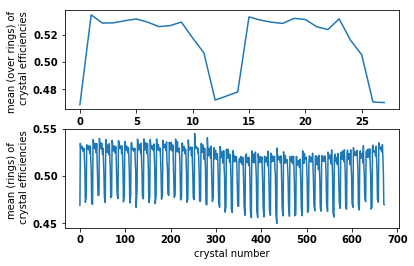

In [300]:
#look at one row of crystal efficiencies to look at virtual crystals every 14 crystals
crystals = 2
plt.subplot(3,1,1)
plt.plot(np.mean(matrices[crystals], axis=1)[0:28])
plt.xlabel("crystal number")
plt.ylabel("mean (over rings) of \n " + normalization_component[crystals])
plt.subplot(3,1,2)
plt.plot(np.mean(matrices[crystals], axis=1))
plt.xlabel("crystal number")
plt.ylabel("mean (rings) of \n " + normalization_component[crystals])


plt.show()

['geometric effects', 'crystal interference', 'crystal efficiencies', 'axial effects', 'paralyzing ring DT parameters', 'non-paralyzing ring DT parameters', 'TX crystal DT parameter']
(672, 55)
virtual_rings: [13 27 41]
virtual rings with 1 indexing: [14 28 42]
(36960, 36960)


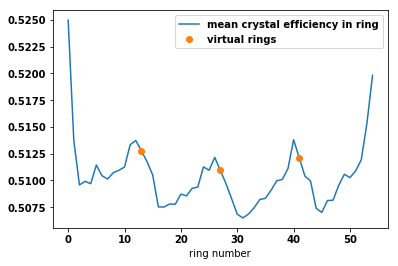

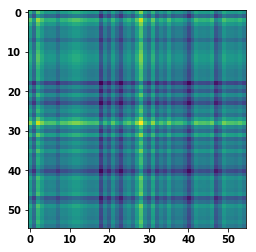

In [280]:
#   relate crystal efficiencies with axial effects

#   räkna fram efficiency för varje ring i crystal efficiences
#   ta average av ringar för michelogram bins

#   normalisera 

print(normalization_component)
crystal_efficiency_component=2
crystal_efficiency = matrices[crystal_efficiency_component]
print(crystal_efficiency.shape)
number_of_rings =55
crystals_per_block = 13

ring_efficiency = np.mean(crystal_efficiency,axis=0)
#ring_efficiency = np.sum(crystal_efficiency,axis=0)

plt.plot(ring_efficiency)
virtual_rings = np.arange(crystals_per_block,number_of_rings,crystals_per_block+1)
plt.plot(virtual_rings, ring_efficiency[virtual_rings], 'o')
plt.xlabel(matrix_axis_labels[crystal_efficiency_component][1])
plt.legend(["mean crystal efficiency in ring", "virtual rings"])
ring_pair_efficiency = np.zeros((number_of_rings, number_of_rings))
print("virtual_rings:", virtual_rings)
print("virtual rings with 1 indexing:", virtual_rings+1)
ring_pair_efficiency = np.outer(ring_efficiency, ring_efficiency)
#print(np.mean(matrices[crystal_efficiency_component])*109/55)

#try crystal by crystal
#then sum up crystal pair efficiencies
crystal_pair_efficiency = np.outer(crystal_efficiency,crystal_efficiency)
print(crystal_pair_efficiency.shape)
new_shape = matrices[crystal_efficiency_component].shape
new_shape = new_shape + new_shape
crystal_pair_efficiency_4D = np.reshape(crystal_pair_efficiency, newshape=new_shape)
plt.figure()
plt.imshow(crystal_pair_efficiency_4D[10,:,10,:])
plt.show()

In [275]:
#constants from header files
span =11
maximal_ring_difference = 49
number_of_segments = 9
print("maximal_ring_difference by header file:", maximal_ring_difference)
maximal_ring_difference = span*(number_of_segments-1)//2 + (span-1)//2
print("maximal_ring_difference by segment and span equation:", maximal_ring_difference)
#get relevant coordinates per pair (r1, r2)
R1,R2 = np.meshgrid(np.arange(number_of_rings), np.arange(number_of_rings))
ring_mean = (R1+R2)/2 

ring_difference = R2-R1
#do axial compression, lower ring difference resolution
segment_ring_difference = ((ring_difference + span//2)// span) * span

#within maximal ring difference
recorded_pairs_bool = np.abs(ring_difference) <= maximal_ring_difference
recorded_pairs = np.array(recorded_pairs_bool, dtype=int)

#half planes
half_planes_bool = ring_mean//1 != (ring_mean +0.5//1)

half_planes = np.array(half_planes_bool, dtype=int)

#michelogram bins
michelogram_bins = np.zeros_like(recorded_pairs)

#segment by segment
for k in range(number_of_segments):
    #print("segment", k)
    mi_0=Utility.FIRST_MI_OF_SEGMENT[k]
    #print("mi_0", mi_0)
    seg_rd = Utility.SEGMENT_OFFSET_MAP[k]*span
    #print("seg_rd", seg_rd)
    in_segment_bool = segment_ring_difference == seg_rd
    axial_offset = Utility.AXIAL_OF_MI[mi_0]
    #print("axial_offset", axial_offset)
    michelogram_bins[in_segment_bool] = ring_mean[in_segment_bool]*2 + mi_0 - axial_offset

#count ring pairs per michelogram bin
michelogram_bin_ring_pair_count = np.zeros(Utility.NUMBER_OF_SINOGRAMS)
np.add.at(michelogram_bin_ring_pair_count, michelogram_bins[recorded_pairs_bool],1)
#convert to ringpair view
michelogram_bin_ring_pair_count_2D = michelogram_bin_ring_pair_count[michelogram_bins]
michelogram_bin_ring_pair_count_2D[recorded_pairs_bool == False] = 0

#virtual ring pairs


# calculate mi bin efficiency
mi_bin_efficiency = np.zeros(Utility.NUMBER_OF_SINOGRAMS)
np.add.at(mi_bin_efficiency,
         michelogram_bins[recorded_pairs_bool],
         ring_pair_efficiency[recorded_pairs_bool])
#divide by number of ring pairs per michelogram bin
mi_bin_efficiency_norm = mi_bin_efficiency *1
mi_bin_efficiency_norm /= michelogram_bin_ring_pair_count
mi_bin_efficiency_norm /= np.sum(mi_bin_efficiency_norm)
mi_bin_efficiency_norm *= Utility.NUMBER_OF_SINOGRAMS

#convert to ringpair view
mi_bin_efficiency_2D = mi_bin_efficiency[michelogram_bins]
mi_bin_efficiency_2D[recorded_pairs_bool == False] = 0
mi_bin_efficiency_norm_2D = mi_bin_efficiency_norm[michelogram_bins]
mi_bin_efficiency_norm_2D[recorded_pairs_bool == False] = 0

maximal_ring_difference by header file: 49
maximal_ring_difference by segment and span equation: 49


In [276]:
def rm_rd(r1,r2):
    return ((r1+r2)/2, r2-r1)


def r1_r2(rm,rd):
    #2*rm + rd = r1+r2+r2-r1=2r2
    #2*rm - rd = r1+r2-r2+r1=2ri
    return ((2*rm-rd)/2,(2*rm+rd)/2)

In [277]:
#check inversion
for r1 in range(number_of_rings):
    for r2 in range(number_of_rings):
        rm,rd = rm_rd(r1,r2)
        r_r1, r_r2 = r1_r2(rm,rd)
        if r1 != r_r1:
            print("r1 error")
        if r2 != r_r2:
            print("r2 error")

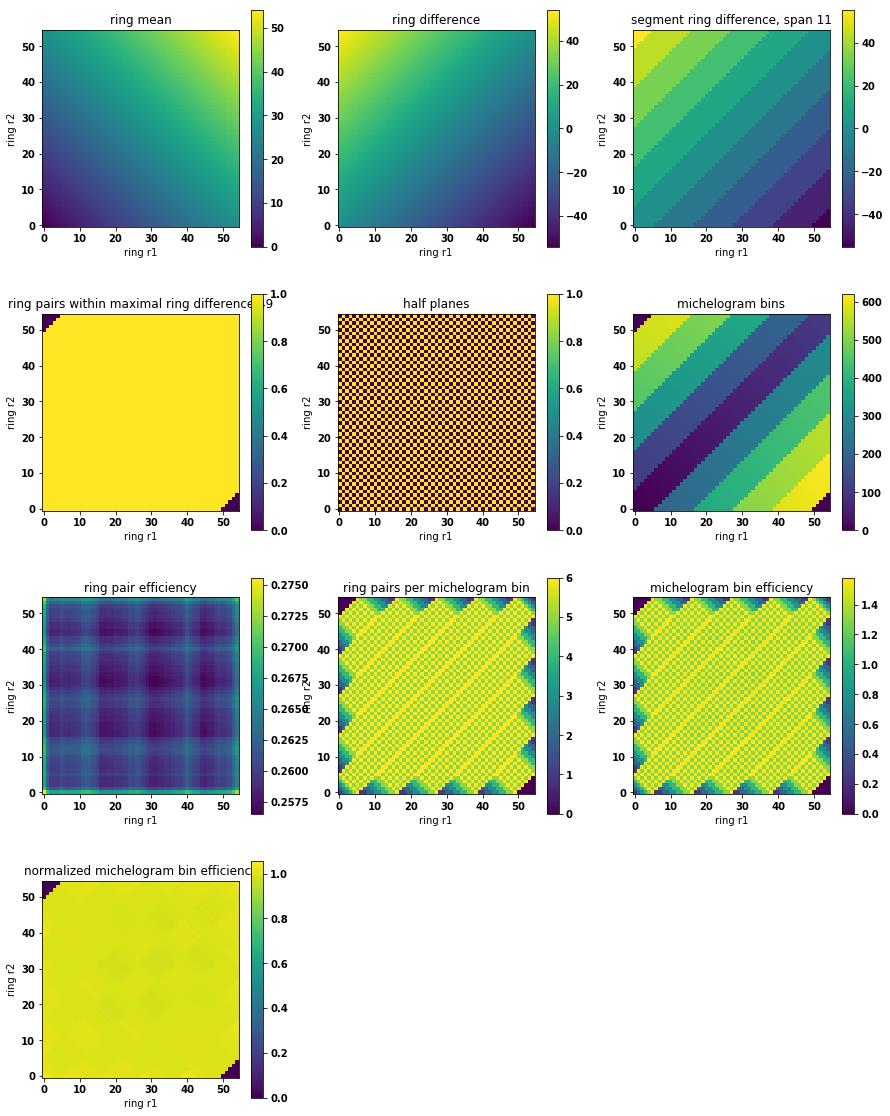

In [278]:
#look
intermediate_result = [ring_mean, 
                       ring_difference, 
                       segment_ring_difference,
                      recorded_pairs, 
                      half_planes,
                      michelogram_bins,
                      ring_pair_efficiency,
                      michelogram_bin_ring_pair_count_2D,
                      mi_bin_efficiency_2D,
                      mi_bin_efficiency_norm_2D]
xlabel = "ring r1"
ylabel = "ring r2"
title_str = ["ring mean", 
             "ring difference", 
             "segment ring difference, span " + str(span),
            "ring pairs within maximal ring difference " + str(maximal_ring_difference),
            "half planes",
            "michelogram bins",
            "ring pair efficiency",
            "ring pairs per michelogram bin",
            "michelogram bin efficiency",
            "normalized michelogram bin efficiency"]

#select which ones to plot
result_of_interest=[2,-3,-2,-1]
result_of_interest = np.arange(len(title_str))
columns = 3

plot_shape=[columns, len(result_of_interest)//columns+1]
plt.figure(figsize=tuple(5*np.array(plot_shape)))
for j,k in enumerate(result_of_interest):
    plt.subplot(plot_shape[1],plot_shape[0],j+1)
    plt.imshow(intermediate_result[k], origin='lower')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.colorbar()
    plt.title(title_str[k])

plt.show()

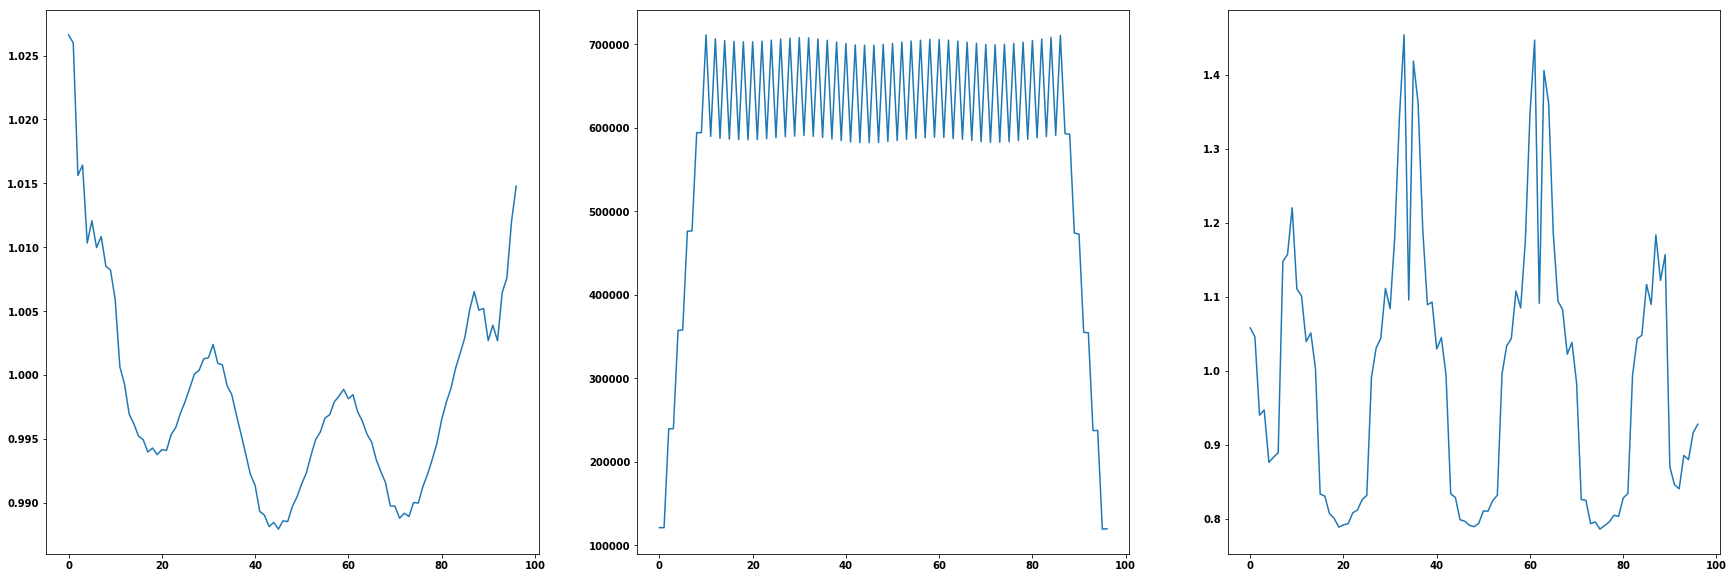

In [272]:
plt.figure(figsize=[30,10])
seg=1
a = Utility.FIRST_MI_OF_SEGMENT[seg]
b = a+Utility.SEGMENT_TABLE[seg]
plt.subplot(1,3,1)
plt.plot(mi_bin_efficiency_norm[a:b])
plt.subplot(1,3,2)
plt.plot(mi_bin_efficiency[a:b])
plt.subplot(1,3,3)
plt.plot(matrices[3][a:b])
plt.show()

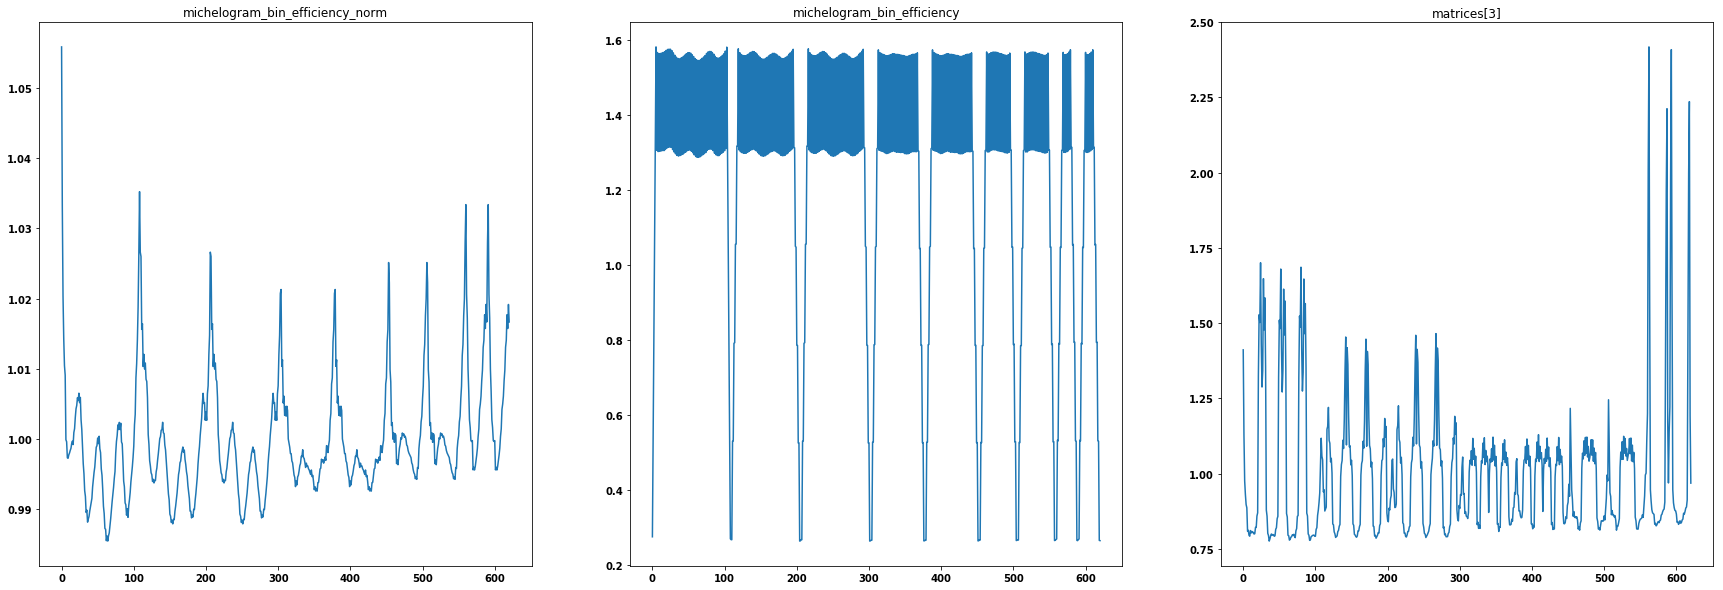

In [283]:
plt.figure(figsize=[30,10])
plt.subplot(1,3,1)
plt.plot(mi_bin_efficiency_norm)
plt.title("michelogram_bin_efficiency_norm")
plt.subplot(1,3,2)
plt.plot(mi_bin_efficiency)
plt.title("michelogram_bin_efficiency")
plt.subplot(1,3,3)
plt.plot(matrices[3])
plt.title("matrices[3]")
plt.show()

In [265]:
print("axial effects mean", np.mean(matrices[3]))
print("estimated axial effects mean", np.mean(mi_bin_efficiency_norm))

axial effects mean 0.9999998
estimated axial effects mean 1.0


In [327]:
for m in [-1,-2,-3]:
    print(np.unique(matrices[m]))

[0.]
[-2.875e-14]
[-8.614e-07]


In [326]:
print(normalization_component)

['geometric effects', 'crystal interference', 'crystal efficiencies', 'axial effects', 'paralyzing ring DT parameters', 'non-paralyzing ring DT parameters', 'TX crystal DT parameter']


In [330]:
#calculate extra factor
pa = matrices[-3][0]
npa = matrices[-2][0]
npt = matrices[-1][0]
#inget s :o 
s = 1 
c = np.exp(-s*pa/(1+s*npa))/((1+s*npa)*(1+s*npt))
print(c)
#eftersom den är konstant, borde de inte kunna spela så stor roll

1.0000008614003966


['geometric effects', 'crystal interference', 'crystal efficiencies', 'axial effects', 'paralyzing ring DT parameters', 'non-paralyzing ring DT parameters', 'TX crystal DT parameter']
[(400, 109), (14, 400), (672, 55), 621, 55, 55, 14]


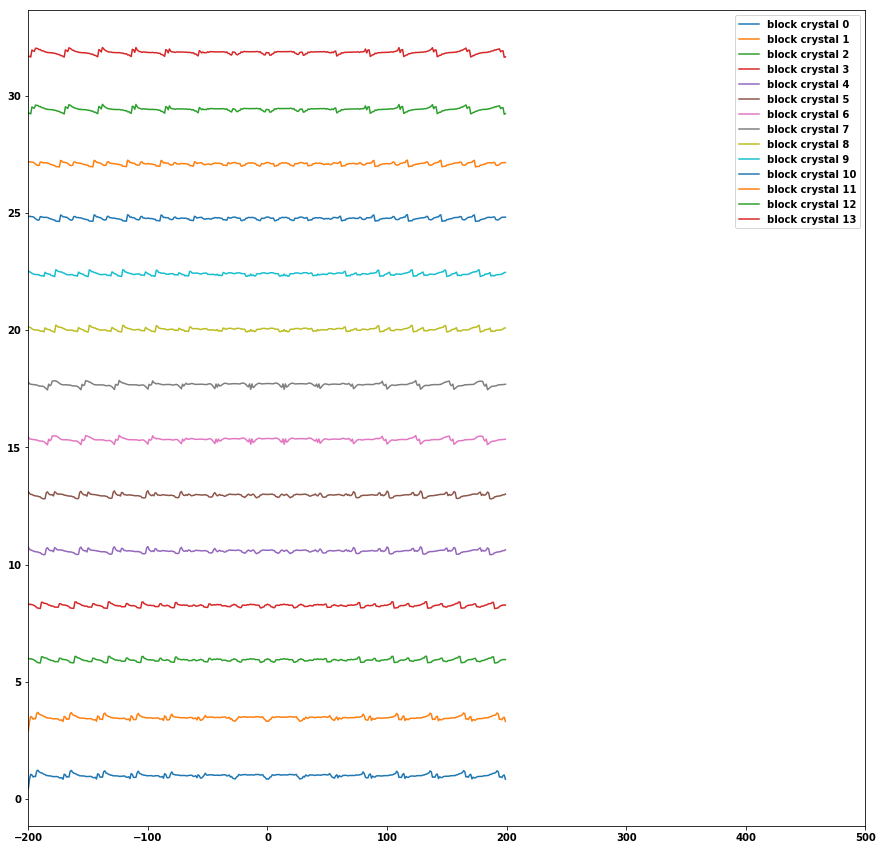

crystal mean
 [1.0025786  1.0025786  1.0015383  1.0015383  1.0014238  1.0014238
 0.99044305 0.99044305 1.0016868  1.0016868  1.0024441  1.0024441
 1.0025933  1.0025933 ]
The average value of each profile is unity although for clarity, a constant has been added to the profiles in the plot


In [35]:
#försök att återskapa bild om crystal interference från Casey 1995
print(normalization_component)
print(matrix_size)
crystal_interference=matrices[1]
visual_offset = 0
radial_offset = np.arange(-200,200)
legends = []
plt.figure(figsize=(15,15))
for k,block_crystal_interferences in enumerate(crystal_interference):
    plt.plot(radial_offset, block_crystal_interferences+visual_offset)
    visual_offset += 2*np.max(block_crystal_interferences)
    legends.append("block crystal " + str(k))

plt.xlim(-200, 500)
plt.legend(legends, loc ='upper right')
plt.show()
    
print("crystal mean\n", np.mean(crystal_interference, axis=1))
print("The average value of each profile is unity although for clarity, a constant has been added to the profiles in the plot")
    